In [244]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.metrics import f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%config Completer.use_jedi = False

In [252]:
df = pd.read_csv(r"database\\processed-data.csv",index_col=0)

Testing with single random sample 

In [275]:
inx1 = df['stroke'] ==1
df_sample = pd.concat((df.loc[inx1,:],df.loc[~inx1,:].sample(247)))

y = df_sample['stroke']
X = df_sample.drop('stroke', axis=1).values

In [276]:
print((df_sample['stroke']==1).sum())
print((df_sample['stroke']==0).sum())
print(df_sample.shape[0])

247
247
494


In [277]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)

X_val, X_test, y_val, y_test = train_test_split(X_val,y_val,test_size=0.2,random_state=1)

Tuning the C parameter, which controls the regularization 

In [278]:
C = np.linspace(0.000001,2,100)
score = []
for c in C:
    model = LogisticRegression(C=c,max_iter = 1000)
    model.fit(X_train,y_train)

    y_pred = model.predict(X_val)
    score.append(f1_score(y_val,y_pred,pos_label=1))



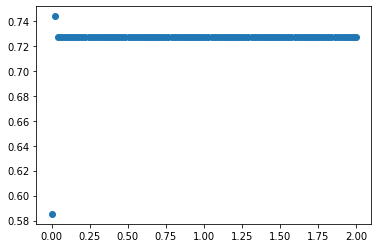

In [279]:
plt.plot(C,score,'o')

Tuning on multiple random samples of the data

In [347]:
inx1 = df['stroke'] ==1
stroke_df = df.loc[inx1,:]
C = np.linspace(0.000001,0.3,100)
scores = []
for i in range(0,20):
    if i%10==0:
        print(f"current iteration is {i}")
    no_stroke_df = df.loc[~inx1,:].sample(247)

    df_sample = pd.concat((stroke_df,no_stroke_df))
    y = df_sample['stroke']
    X = df_sample.drop('stroke', axis=1).values
    
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=1)
    X_val, X_test, y_val, y_test = train_test_split(X_val,y_val,test_size=0.2,random_state=1)

    score = []
    for c in C:
        model = LogisticRegression(C=c,max_iter = 1000)
        model.fit(X_train,y_train)

        y_pred = model.predict(X_val)
        score.append(f1_score(y_val,y_pred,pos_label=1))
    scores.append(score)
    

current iteration is 0
current iteration is 10


In [348]:
scores = np.array(scores)

mean_score = scores.mean(axis=0)

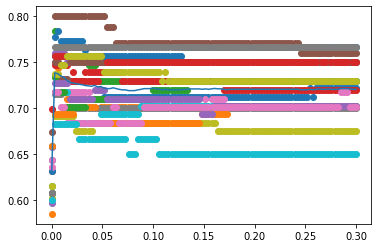

In [349]:
for score in scores:
    plt.plot(C,score,'o')
plt.plot(C,mean_score)


Test tuning on test data

In [350]:
X_train_full = np.concatenate((X_train, X_val))
y_train_full = np.concatenate((y_train, y_val))

In [351]:
model = LogisticRegression(C=0.05,max_iter = 1000,verbose=1)
model.fit(X_train_full,y_train_full)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


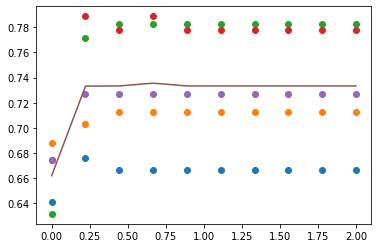